In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
# import seaborn as sns
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression

# Read Data

In [46]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [47]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C


In [48]:
test.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S


# Check Null Values

In [49]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# EDA

In [51]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


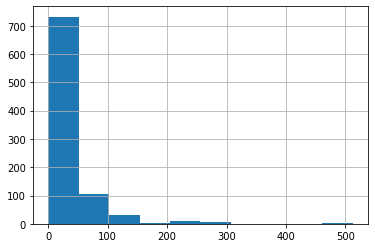

In [52]:
train['Fare'].hist()

# Concat Data

In [53]:
train_except_Survived = train.drop('Survived', axis=1)

In [54]:
train_except_Survived['tag'] = 'train'
test['tag'] = 'test'

In [55]:
df = pd.concat([train_except_Survived, test])

# Feature Engineering

In [56]:
df = df.fillna(0)

### 비어있는 Fare 데이터를 적당한 값으로 채워준다

In [59]:
%matplotlib inline

df.groupby('Pclass')['Fare'].median()[3]

8.05

In [60]:
df.loc[df['Fare'].isnull(), 'Fare'] = df.groupby('Pclass')['Fare'].median()[3]

### 비어있는 Age 데이터를 적당한 값으로 채워준다

방법 1. 전체 데이터를 평균, 중앙, 최빈중 하나로 채워준다

In [61]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()

In [63]:
df['Age_v2'] = df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [64]:
df['Age_v3'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

# Make Dataset for Model Fitting

In [26]:
independents = ['Pclass']
dependent = ['Survived']

In [27]:
train_X = df[df['tag'] == 'train'][independents]
train_y = train[dependent]

test_X = df[df['tag'] == 'test'][independents]

# Model Fitting

In [28]:
reg = LinearRegression().fit(train_X, train_y)

In [29]:
reg.coef_

array([[-0.19699555]])

In [30]:
reg.intercept_

array([0.83863059])

In [31]:
reg.score(train_X, train_y, sample_weight=None)

0.11456941170524182

# Prediction

In [32]:
prediction = reg.predict(test_X)

In [33]:
prediction_binomial = [1 if p>=0.5 else 0 for p in prediction]

In [34]:
df = pd.DataFrame({'prediction': [p[0] for p in prediction],
                   'prediction_binomial': prediction_binomial})

In [35]:
df.sample()

,prediction,prediction_binomial
324,0.641635,1


# Submission

In [36]:
submission = pd.read_csv('./gender_submission.csv')

In [37]:
submission['Survived'] = df['prediction_binomial']